In [2]:
from shapely.geometry import Point, Polygon
from multiprocessing import  Pool
import pandas as pd
import numpy as np
import os
import geopandas as gpd

In [3]:
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame, GeoSeries
import datetime

In [4]:
path = os.getcwd() + '/data/'
path

'/home/json/Documents/DS4A_CO/datatlon/data/'

In [5]:
geographic = pd.read_csv(path + 'geographic.csv')

#geographic['BX35'].dropna().describe()
geographic.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [6]:
#Create dictionarie of zones
dict_zones = {}
for zone in geographic.columns:
    area = geographic[zone].dropna()
    longitude = area[::2].tolist()
    latitude = area[1::2].tolist()
    dict_zones[zone] = Polygon(list(zip(longitude,latitude)))


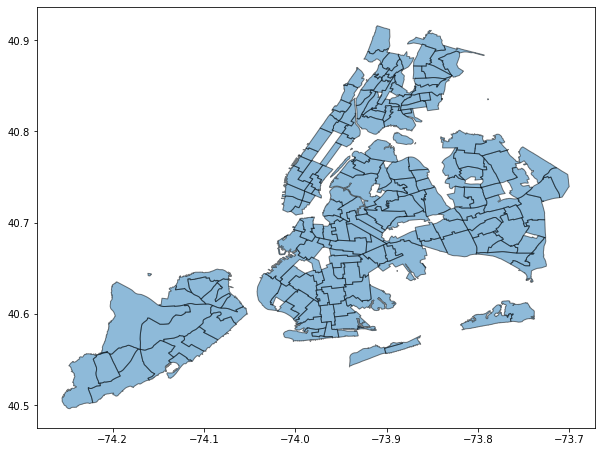

In [28]:
gps = gpd.GeoSeries(dict_zones)
gps.head()
ax = gps.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [29]:
type(gps)
gps.head()

BK88    POLYGON ((-73.97605 40.63128, -73.97717 40.630...
QN52    POLYGON ((-73.79493 40.75781, -73.79475 40.755...
QN48    POLYGON ((-73.77574 40.74333, -73.77580 40.743...
QN51    POLYGON ((-73.80379 40.77562, -73.80099 40.775...
QN27    POLYGON ((-73.86110 40.76367, -73.85993 40.762...
dtype: geometry

In [30]:
gps.crs = {'init': 'epsg:4326'}


In [31]:
gps.head()
gps = gps.to_crs(epsg=3857)
#gps.head()

In [23]:
uber_trips_2014 = pd.read_csv('data/uberTrips2014_zones.csv')
uber_trips_2014.head()

,Unnamed: 0,pickup_datetime,pickup_latitude,pickup_longitude,nta_code
0,0,4/1/14 0:11,40.7690,-73.9549,NaN
1,1,4/1/14 0:17,40.7267,-74.0345,NaN
2,2,4/1/14 0:21,40.7316,-73.9873,MN22
3,3,4/1/14 0:28,40.7588,-73.9776,MN17
4,4,4/1/14 0:33,40.7594,-73.9722,MN19


In [24]:
uber_trips_2014 = uber_trips_2014[['pickup_longitude', 'pickup_latitude', 'nta_code']]
uber_trips_2014 = gpd.GeoDataFrame(uber_trips_2014, geometry=gpd.points_from_xy(uber_trips_2014['pickup_longitude'], uber_trips_2014['pickup_latitude']))
uber_trips_2014.head()

,pickup_longitude,pickup_latitude,nta_code,geometry
0,-73.9549,40.7690,NaN,POINT (-73.95490 40.76900)
1,-74.0345,40.7267,NaN,POINT (-74.03450 40.72670)
2,-73.9873,40.7316,MN22,POINT (-73.98730 40.73160)
3,-73.9776,40.7588,MN17,POINT (-73.97760 40.75880)
4,-73.9722,40.7594,MN19,POINT (-73.97220 40.75940)


In [13]:
#dir(gpd.tools)
dir(gpd)
gpd.__version__

'0.6.1'

In [25]:
uber_trips_2014.crs = {'init': 'epsg:4326'}

,pickup_longitude,pickup_latitude,nta_code,geometry
0,-73.9549,40.7690,NaN,POINT (-8232621.810 4978328.693)
1,-74.0345,40.7267,NaN,POINT (-8241482.841 4972113.170)
2,-73.9873,40.7316,MN22,POINT (-8236228.561 4972832.969)
3,-73.9776,40.7588,MN17,POINT (-8235148.762 4976829.552)
4,-73.9722,40.7594,MN19,POINT (-8234547.637 4976917.731)


In [ ]:
uber_trips_2014 = uber_trips_2014.to_crs(epsg=3857)
uber_trips_2014.head()

In [26]:
#[agg_df['Symbol'] == 'DUK']
NaN_uber_2014 = uber_trips_2014[pd.isna(uber_trips_2014['nta_code'])]

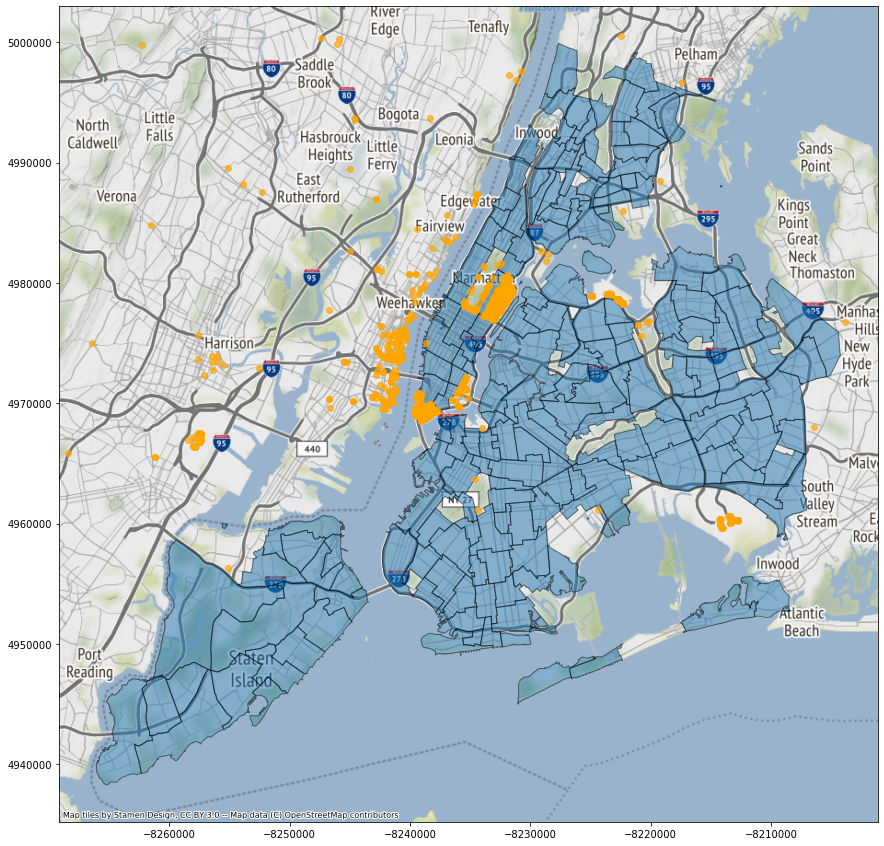

In [32]:
import contextily as ctx
ax = gps.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom='auto')
NaN_uber_2014.head(1000).plot(ax=ax, color="orange", alpha = 0.7)

In [14]:
def getZone(longitude, latitude, zones):
    for zone in zones:
        if Point(longitude,latitude).within(zones[zone]):
            return zone

getZone(-73.9558, 40.8172, dict_zones)
getZone(-73.9776, 40.7588, dict_zones)

'MN17'

In [14]:
#uploading uber_trips_2014
uber_trips_2014 = pd.read_csv(path + 'uber_trips_2014.csv')
uber_trips_2014 = uber_trips_2014[['pickup_datetime','pickup_latitude','pickup_longitude']]                                                                                                                                                              

In [30]:
summary = uber_trips_2014.copy()   

In [31]:
def parallelize_dataframe(df, func, n_cores=6):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [32]:
def apply_zone(df):
    return df.apply(lambda row: getZone(row['pickup_longitude'], row['pickup_latitude'], dict_zones), axis = 1)

In [33]:
#timeit #-n 100 -r 3

#summary['nta_code'] = summary.apply(lambda row: getZone(row['pickup_longitude'], row['pickup_latitude'], dict_zones), axis = 1)
summary['nta_code'] = parallelize_dataframe(summary, apply_zone)
summary.head() 

,pickup_datetime,pickup_latitude,pickup_longitude,nta_code
0,4/1/14 0:11,40.7690,-73.9549,None
1,4/1/14 0:17,40.7267,-74.0345,None
2,4/1/14 0:21,40.7316,-73.9873,MN22
3,4/1/14 0:28,40.7588,-73.9776,MN17
4,4/1/14 0:33,40.7594,-73.9722,MN19


In [1]:
summary.to_csv('uberTrips2014_zones.csv')

NameError: name 'summary' is not defined

### Comenzar acá

In [5]:
zones = pd.read_csv('data/zones.csv')
zones.head()
summary = pd.read_csv('uberTrips2014_zones.csv')
#summary.set_index('nta_code').join(zones.set_index('nta_code'))

In [8]:
#uploading uber_trips_2015
uber_trips_2015 = pd.read_csv(path + 'uber_trips_2015.csv')

In [9]:
uber_trips_2015.head()
uber_trips_2015 = uber_trips_2015[['pickup_datetime', 'pickup_location_id']]

In [10]:
uber_trips_2015.head()

,pickup_datetime,pickup_location_id
0,2015-05-17 09:47:00,141
1,2015-05-17 09:47:00,65
2,2015-05-17 09:47:00,100
3,2015-05-17 09:47:00,80
4,2015-05-17 09:47:00,90


In [11]:
uber_trips_2015.set_index('pickup_location_id').join(zones.set_index('location_id'))

,pickup_datetime,borough,zone,service_zone,nta_code
1,2015-02-22 13:00:16,EWR,Newark Airport,EWR,NJ01
1,2015-05-17 08:15:00,EWR,Newark Airport,EWR,NJ01
1,2015-02-07 14:57:37,EWR,Newark Airport,EWR,NJ01
1,2015-05-17 11:43:00,EWR,Newark Airport,EWR,NJ01
1,2015-03-04 15:14:00,EWR,Newark Airport,EWR,NJ01
...,...,...,...,...,...
265,2015-05-08 10:27:00,NaN,NaN,NaN,NaN
265,2015-05-12 20:10:00,NaN,NaN,NaN,NaN
265,2015-05-12 20:36:00,NaN,NaN,NaN,NaN
265,2015-02-20 08:39:03,NaN,NaN,NaN,NaN


In [22]:
uber_trips_2015_unido = pd.merge(zones, uber_trips_2015, left_on='location_id', right_on='pickup_location_id', how='inner')

In [13]:
zones_alone = zones[['borough', 'service_zone', 'nta_code']].drop_duplicates()
#pd.unique(df[['Col1', 'Col2']].values.ravel('K'))

['_', '_10', '_11', '__', 'summary', 'uber_trips_2015', 'zones', 'zones_alone']


In [15]:
summary_unido_unico = pd.merge(zones_alone, summary, on='nta_code', how='inner')

In [18]:
summary_unido_col = summary_unido_unico[['borough', 'service_zone', 'nta_code', 'pickup_datetime']]
summary_unido_col.head()
uber_trips_2014_unido_col = summary_unido_col.copy()
uber_trips_2014_unido_col.head()

,borough,service_zone,nta_code,pickup_datetime
0,Queens,Boro Zone,QN61,4/5/14 17:18
1,Queens,Boro Zone,QN61,4/6/14 15:46
2,Queens,Boro Zone,QN61,4/8/14 15:44
3,Queens,Boro Zone,QN61,4/11/14 11:16
4,Queens,Boro Zone,QN61,4/23/14 14:37


In [20]:
uber_trips_2014_unido_col['pickup_time'] = pd.to_datetime(uber_trips_2014_unido_col['pickup_datetime'])
uber_trips_2014_unido_col.head()

,borough,service_zone,nta_code,pickup_datetime,pickup_time
0,Queens,Boro Zone,QN61,4/5/14 17:18,2014-04-05 17:18:00
1,Queens,Boro Zone,QN61,4/6/14 15:46,2014-04-06 15:46:00
2,Queens,Boro Zone,QN61,4/8/14 15:44,2014-04-08 15:44:00
3,Queens,Boro Zone,QN61,4/11/14 11:16,2014-04-11 11:16:00
4,Queens,Boro Zone,QN61,4/23/14 14:37,2014-04-23 14:37:00


In [23]:
uber_trips_2015_unido.head()
uber_trips_2015_unido_col = uber_trips_2015_unido[['borough', 'service_zone', 'nta_code', 'pickup_datetime']].copy()
uber_trips_2015_unido_col['pickup_time'] = pd.to_datetime(uber_trips_2015_unido_col['pickup_datetime'])
uber_trips_2015_unido_col.head()

,borough,service_zone,nta_code,pickup_datetime,pickup_time
0,EWR,EWR,NJ01,2015-02-22 13:00:16,2015-02-22 13:00:16
1,EWR,EWR,NJ01,2015-05-17 08:15:00,2015-05-17 08:15:00
2,EWR,EWR,NJ01,2015-02-07 14:57:37,2015-02-07 14:57:37
3,EWR,EWR,NJ01,2015-05-17 11:43:00,2015-05-17 11:43:00
4,EWR,EWR,NJ01,2015-03-04 15:14:00,2015-03-04 15:14:00


UsageError: Line magic function `%usage()` not found.


In [24]:
uber_14_15 = pd.concat([uber_trips_2014_unido_col, uber_trips_2015_unido_col])
uber_14_15.head()

,borough,service_zone,nta_code,pickup_datetime,pickup_time
0,Queens,Boro Zone,QN61,4/5/14 17:18,2014-04-05 17:18:00
1,Queens,Boro Zone,QN61,4/6/14 15:46,2014-04-06 15:46:00
2,Queens,Boro Zone,QN61,4/8/14 15:44,2014-04-08 15:44:00
3,Queens,Boro Zone,QN61,4/11/14 11:16,2014-04-11 11:16:00
4,Queens,Boro Zone,QN61,4/23/14 14:37,2014-04-23 14:37:00


In [25]:
uber_14_15.tail()

,borough,service_zone,nta_code,pickup_datetime,pickup_time
14264210,Manhattan,Yellow Zone,MN32,2015-02-20 19:57:49,2015-02-20 19:57:49
14264211,Manhattan,Yellow Zone,MN32,2015-05-12 18:12:00,2015-05-12 18:12:00
14264212,Manhattan,Yellow Zone,MN32,2015-05-12 18:14:00,2015-05-12 18:14:00
14264213,Manhattan,Yellow Zone,MN32,2015-02-20 00:34:53,2015-02-20 00:34:53
14264214,Manhattan,Yellow Zone,MN32,2015-05-08 15:43:00,2015-05-08 15:43:00


In [105]:
uber_14_15['YYYYMM'] = uber_14_15['pickup_time'].head().map(lambda x: str(x.year)  + str(x.month))

In [46]:
#Borrando memoria para trabajar.

alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame) and var!='uber_14_15']

for e in alldfs:
    del globals()[e]

#[x if x==2 else 'nada' for x in range(10)]

alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]
print(alldfs)


['uber_14_15']


In [47]:
uber_14_15.head()

,borough,service_zone,nta_code,pickup_datetime,pickup_time
0,Queens,Boro Zone,QN61,4/5/14 17:18,2014-04-05 17:18:00
1,Queens,Boro Zone,QN61,4/6/14 15:46,2014-04-06 15:46:00
2,Queens,Boro Zone,QN61,4/8/14 15:44,2014-04-08 15:44:00
3,Queens,Boro Zone,QN61,4/11/14 11:16,2014-04-11 11:16:00
4,Queens,Boro Zone,QN61,4/23/14 14:37,2014-04-23 14:37:00


In [48]:
uber_14_15['YYYY-MM'] = uber_14_15['pickup_time'].apply(lambda x: str(x)[0:7])
uber_14_15.head()

,borough,service_zone,nta_code,pickup_datetime,pickup_time,YYYY-MM
0,Queens,Boro Zone,QN61,4/5/14 17:18,2014-04-05 17:18:00,2014-04
1,Queens,Boro Zone,QN61,4/6/14 15:46,2014-04-06 15:46:00,2014-04
2,Queens,Boro Zone,QN61,4/8/14 15:44,2014-04-08 15:44:00,2014-04
3,Queens,Boro Zone,QN61,4/11/14 11:16,2014-04-11 11:16:00,2014-04
4,Queens,Boro Zone,QN61,4/23/14 14:37,2014-04-23 14:37:00,2014-04


In [50]:
serie_monthly_uber = uber_14_15.groupby('YYYY-MM')['pickup_time'].count()

In [51]:
type(serie_monthly_uber)

pandas.core.series.Series

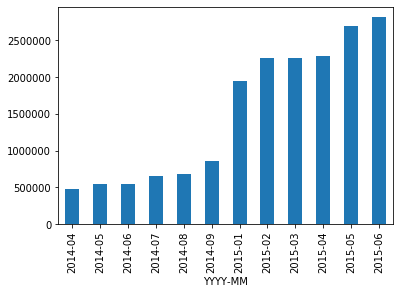

In [53]:
serie_monthly_uber.plot.bar()